## Name- Jaden Borges
## Roll no.- 08
## Exp 4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

## Batch-1
## 4-2-2026


## General for all 3 algorithims

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix



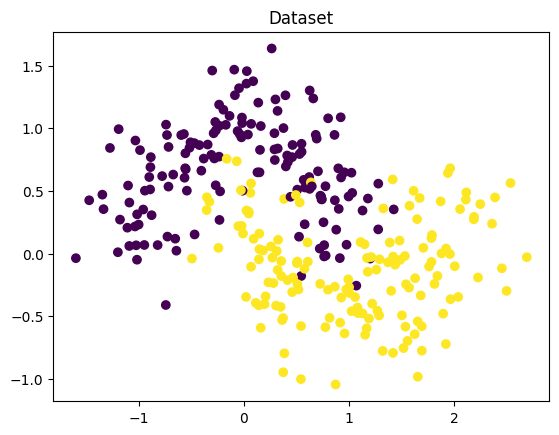

In [3]:
X,y = make_moons(n_samples=300, noise=0.25, random_state=42)
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Dataset")
plt.show()

## Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=0
)

## Scaling Needed for LR and kNN

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Part A: Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression
Accuracy: 0.8777777777777778
Confusion Matrix:
[[34  5]
 [ 6 45]]


## Part B: Decision Tree


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test_scaled)
print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
[[29 10]
 [ 3 48]]


## Part C: k-Nearest Neighbors (kNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("k-Nearest Neighbors (kNN)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


k-Nearest Neighbors (kNN)
Accuracy: 0.9111111111111111
Confusion Matrix:
[[38  1]
 [ 7 44]]


## Visualization

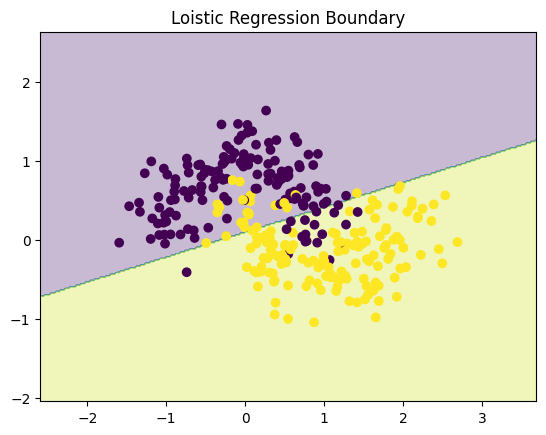

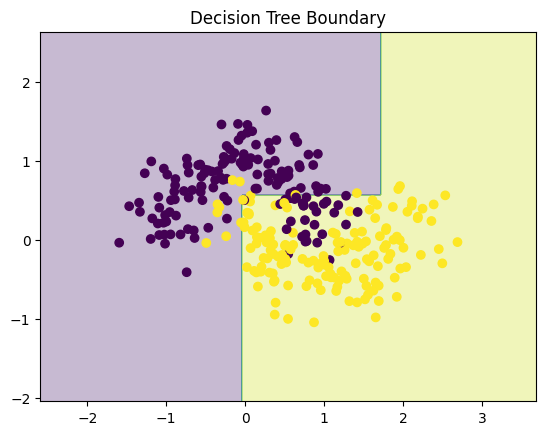

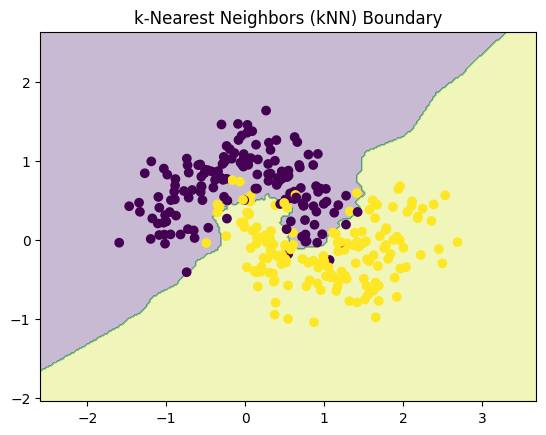

In [23]:
def plot_boundary(model,scaled,title):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

  grid = np.c_[xx.ravel(),yy.ravel()]
  if scaled:
    grid = scaler.transform(grid)
  Z = model.predict(grid)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,alpha=0.3)
  plt.scatter(X[:,0],X[:,1],c=y)
  plt.title(title)
  plt.show()


plot_boundary(lr,True,"Loistic Regression Boundary")
plot_boundary(dt,True,"Decision Tree Boundary")
plot_boundary(knn,True,"k-Nearest Neighbors (kNN) Boundary")

